In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, regularizers
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
# Paths to the dataset
lung_path = r'C:\Users\ldani\Documents\Github\Grupo07_RPatrones_2024_I\Challenges\LuisChirre\heart-and-lung-segmentations-for-mimic-cxrmimic-cxr-jpg-and-montgomery-county-tb-databases-1.0.0\mimic_masks\lungs'
heart_path = r'C:\Users\ldani\Documents\Github\Grupo07_RPatrones_2024_I\Challenges\LuisChirre\heart-and-lung-segmentations-for-mimic-cxrmimic-cxr-jpg-and-montgomery-county-tb-databases-1.0.0\mimic_masks\heart'

In [10]:
# Load and prepare the dataset
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), color_mode='grayscale')
        if img is not None:
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = tf.image.resize(img, (128, 128))  # Adjust the size as needed
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

lung_images, lung_labels = load_images_from_folder(lung_path, 0)
heart_images, heart_labels = load_images_from_folder(heart_path, 1)

# Combine and split the data
images = np.concatenate((lung_images, heart_images), axis=0)
labels = np.concatenate((lung_labels, heart_labels), axis=0)

# Normalize images
images = images / 255.0

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [12]:
# Create the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(128, 128, 1)))  # Adjust input shape as per resized images
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
# Split the training data for validation
x_val = x_train[:40]
partial_x_train = x_train[40:]

y_val = y_train[:40]
partial_y_train = y_train[40:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=10,
                    validation_data=(x_val, y_val))


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9317 - loss: 0.1017 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 7.4172e-04 - val_accuracy: 1.0000 - val_loss: 1.7105e-04
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.7302e-04 - val_accuracy: 1.0000 - val_loss: 6.2141e-05
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.8287e-05 - val_accuracy: 1.0000 - val_loss: 2.9716e-05
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.1513e-05 - val_accuracy: 1.0000 - val_loss: 1.7773e-05
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.1259e-05 - val_accuracy: 1.0000 - val_loss: 1.2408e-05
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.5183e-06 - val_accuracy: 1.0000 - val_loss: 9.6349e-06
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 -

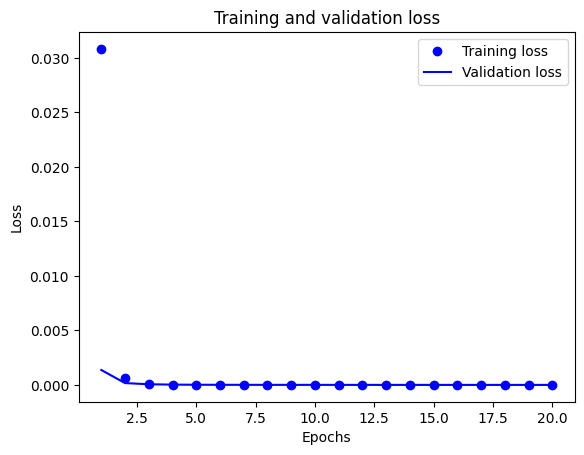

In [14]:
# Plotting training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
results = model.evaluate(x_test, y_test)
print(f'Test accuracy: {results[1]}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.0250e-06  
Test accuracy: 1.0


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7759 - loss: 0.4797 - val_accuracy: 0.9750 - val_loss: 0.3746
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9728 - loss: 0.3071 - val_accuracy: 1.0000 - val_loss: 0.3645
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3404 - val_accuracy: 1.0000 - val_loss: 0.3560
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3233 - val_accuracy: 1.0000 - val_loss: 0.3471
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3173 - val_accuracy: 1.0000 - val_loss: 0.3383
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3023 - val_accuracy: 1.0000 - val_loss: 0.3293
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.3074 - val_accuracy: 1.0000 - val_loss: 0.3200
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2881 - val_accuracy: 1.0000 - val_loss:

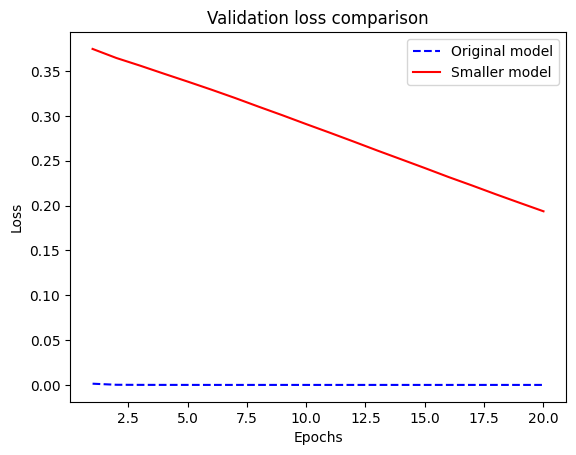

In [16]:
# Smaller model
smaller_model = models.Sequential()
smaller_model.add(layers.Flatten(input_shape=(128, 128, 1)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

smaller_history = smaller_model.fit(partial_x_train,
                                    partial_y_train,
                                    epochs=20,
                                    batch_size=10,
                                    validation_data=(x_val, y_val))

# Plotting validation loss for both models
smaller_val_loss = smaller_history.history['val_loss']

plt.plot(epochs, val_loss_values, 'b--', label='Original model')
plt.plot(epochs, smaller_val_loss, 'r-', label='Smaller model')
plt.title('Validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9625 - loss: 0.1862 - val_accuracy: 1.0000 - val_loss: 0.0425
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0403 - val_accuracy: 1.0000 - val_loss: 0.0347
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0326 - val_accuracy: 1.0000 - val_loss: 0.0273
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0211
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0197 - val_accuracy: 1.0000 - val_loss: 0.0164
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss

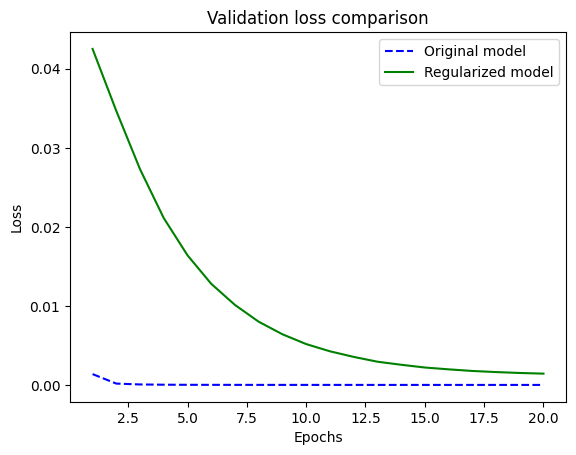

In [17]:
# Regularized model
regularized_model = models.Sequential()
regularized_model.add(layers.Flatten(input_shape=(128, 128, 1)))
regularized_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
regularized_model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
regularized_model.add(layers.Dense(1, activation='sigmoid'))

regularized_model.compile(optimizer='rmsprop',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

regularized_history = regularized_model.fit(partial_x_train,
                                            partial_y_train,
                                            epochs=20,
                                            batch_size=10,
                                            validation_data=(x_val, y_val))

# Plotting validation loss for regularized model
regularized_val_loss = regularized_history.history['val_loss']

plt.plot(epochs, val_loss_values, 'b--', label='Original model')
plt.plot(epochs, regularized_val_loss, 'g-', label='Regularized model')
plt.title('Validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6386 - loss: 1.2109 - val_accuracy: 1.0000 - val_loss: 0.0515
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8329 - loss: 0.3669 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8963 - loss: 0.3746 - val_accuracy: 1.0000 - val_loss: 0.2350
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8785 - loss: 0.4564 - val_accuracy: 1.0000 - val_loss: 0.0199
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8952 - loss: 0.2331 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8709 - loss: 0.4427 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7899 - loss: 0.5712 - val_accuracy: 1.0000 - val_loss: 0.0076
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8862 - loss: 0.2113 - val_accuracy: 1.0000 - val_loss:

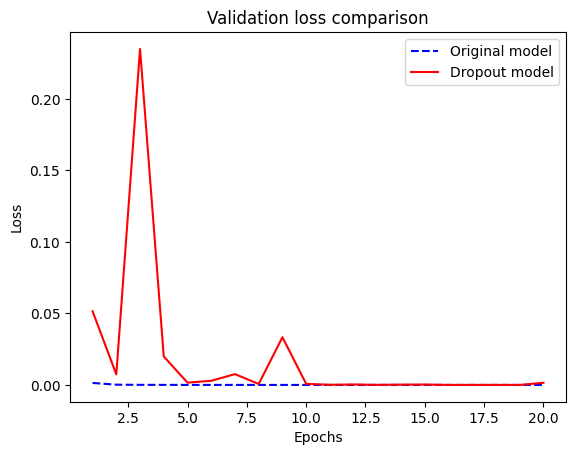

In [18]:
# Model with Dropout
dropout_model = models.Sequential()
dropout_model.add(layers.Flatten(input_shape=(128, 128, 1)))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(16, activation='relu'))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(1, activation='sigmoid'))

dropout_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

dropout_history = dropout_model.fit(partial_x_train,
                                    partial_y_train,
                                    epochs=20,
                                    batch_size=10,
                                    validation_data=(x_val, y_val))

# Plotting validation loss for dropout model
dropout_val_loss = dropout_history.history['val_loss']

plt.plot(epochs, val_loss_values, 'b--', label='Original model')
plt.plot(epochs, dropout_val_loss, 'r-', label='Dropout model')
plt.title('Validation loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Predictions
predictions = model.predict(x_test)
print(predictions[10])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[9.054523e-11]
